In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Parameters
t = 1.0         # hopping within each chain
t_perp = 1.25    # inter-chain coupling

# 4-site tight-binding Hamiltonian with open boundary conditions
H_chain = -t * np.array([
    [0, 1, 0, 0],
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [0, 0, 1, 0]
])

# 8x8 full Hamiltonian: 2 chains of 4 sites each
I4 = np.eye(4)
H_full = np.block([
    [H_chain, t_perp * I4],
    [t_perp * I4, H_chain]
])

In [4]:
# Diagonalize full Hamiltonian
eigvals, eigvecs = np.linalg.eigh(H_full)
eigvecs

array([[ 0.26286556,  0.4253254 ,  0.4253254 ,  0.26286556, -0.26286556,
         0.4253254 , -0.4253254 ,  0.26286556],
       [ 0.4253254 ,  0.26286556, -0.26286556,  0.4253254 ,  0.4253254 ,
         0.26286556,  0.26286556, -0.4253254 ],
       [ 0.4253254 , -0.26286556, -0.26286556,  0.4253254 , -0.4253254 ,
        -0.26286556,  0.26286556,  0.4253254 ],
       [ 0.26286556, -0.4253254 ,  0.4253254 ,  0.26286556,  0.26286556,
        -0.4253254 , -0.4253254 , -0.26286556],
       [-0.26286556, -0.4253254 , -0.4253254 ,  0.26286556,  0.26286556,
         0.4253254 , -0.4253254 ,  0.26286556],
       [-0.4253254 , -0.26286556,  0.26286556,  0.4253254 , -0.4253254 ,
         0.26286556,  0.26286556, -0.4253254 ],
       [-0.4253254 ,  0.26286556,  0.26286556,  0.4253254 ,  0.4253254 ,
        -0.26286556,  0.26286556,  0.4253254 ],
       [-0.26286556,  0.4253254 , -0.4253254 ,  0.26286556, -0.26286556,
        -0.4253254 , -0.4253254 , -0.26286556]])

In [5]:
# Choose the two lowest-energy eigenstates (lowest eigenvalues)
idx = np.argsort(eigvals)
lowest_states = eigvecs[:, idx[:2]]  # shape: (8, 2)
lowest_states

array([[ 0.26286556,  0.4253254 ],
       [ 0.4253254 ,  0.26286556],
       [ 0.4253254 , -0.26286556],
       [ 0.26286556, -0.4253254 ],
       [-0.26286556, -0.4253254 ],
       [-0.4253254 , -0.26286556],
       [-0.4253254 ,  0.26286556],
       [-0.26286556,  0.4253254 ]])

In [6]:
eigvecs = eigvecs[:, idx]
np.abs(eigvecs)**2

array([[0.0690983, 0.1809017, 0.1809017, 0.0690983, 0.0690983, 0.1809017,
        0.1809017, 0.0690983],
       [0.1809017, 0.0690983, 0.0690983, 0.1809017, 0.1809017, 0.0690983,
        0.0690983, 0.1809017],
       [0.1809017, 0.0690983, 0.0690983, 0.1809017, 0.1809017, 0.0690983,
        0.0690983, 0.1809017],
       [0.0690983, 0.1809017, 0.1809017, 0.0690983, 0.0690983, 0.1809017,
        0.1809017, 0.0690983],
       [0.0690983, 0.1809017, 0.1809017, 0.0690983, 0.0690983, 0.1809017,
        0.1809017, 0.0690983],
       [0.1809017, 0.0690983, 0.0690983, 0.1809017, 0.1809017, 0.0690983,
        0.0690983, 0.1809017],
       [0.1809017, 0.0690983, 0.0690983, 0.1809017, 0.1809017, 0.0690983,
        0.0690983, 0.1809017],
       [0.0690983, 0.1809017, 0.1809017, 0.0690983, 0.0690983, 0.1809017,
        0.1809017, 0.0690983]])

In [7]:
# Construct projector P (2x8)
P = lowest_states.T.conj()  # shape: (2, 8)
# Project H_full into 2D subspace
H_eff = P @ H_full @ P.T.conj()  # shape: (2, 2)
H_eff_real = np.real_if_close(H_eff)
eigvals, H_eff_real

(array([-2.86803399, -1.86803399, -0.63196601, -0.36803399,  0.36803399,
         0.63196601,  1.86803399,  2.86803399]),
 array([[-2.86803399e+00,  4.36335140e-16],
        [ 3.95031975e-16, -1.86803399e+00]]))

In [8]:
P.shape

(2, 8)

In [9]:
eig, eigvec = np.linalg.eigh(H_eff_real)
eig

array([-2.86803399, -1.86803399])

In [10]:
# Sort eigenvalues by their absolute values (to find those closest to zero energy)
abs_sorted_idx = np.argsort(np.abs(eigvals))
# Select the two eigenstates with minimum |E|
mid_states = eigvecs[:, abs_sorted_idx[:2]]  # shape: (8, 2)
# Construct new projector
P_mid = mid_states.T.conj()  # shape: (2, 8)
# Project H_full into this new subspace
H_eff_mid = P_mid @ H_full @ P_mid.T.conj()
H_eff_mid_real = np.real_if_close(H_eff_mid)
# Show the corresponding eigenvalues and effective Hamiltonian
selected_eigvals = eigvals[abs_sorted_idx[:2]]
selected_eigvals, H_eff_mid_real


(array([ 0.36803399, -0.36803399]),
 array([[ 3.68033989e-01, -1.96586014e-16],
        [-1.83553182e-16, -3.68033989e-01]]))

In [11]:
e, v = np.linalg.eigh(H_eff_mid_real)
e

array([-0.36803399,  0.36803399])

In [12]:
# Diagonalize the effective 2x2 Hamiltonian (projected onto states with lowest |E|)
eigvals_eff, eigvecs_eff = np.linalg.eigh(H_eff_mid_real)
# Take the eigenvector corresponding to the lowest effective eigenvalue
v_eff = eigvecs_eff[:, 0]  # lowest eigenvalue's eigenvector in 2D
# Back-project this eigenvector into the full 8D lattice space
Psi_full = P_mid.T.conj() @ v_eff  # shape: (8,)
# Calculate probability distribution on each site
prob_dist = np.abs(Psi_full)**2
prob_dist

array([0.0690983, 0.1809017, 0.1809017, 0.0690983, 0.0690983, 0.1809017,
       0.1809017, 0.0690983])

In [13]:
eigvals_eff

array([-0.36803399,  0.36803399])

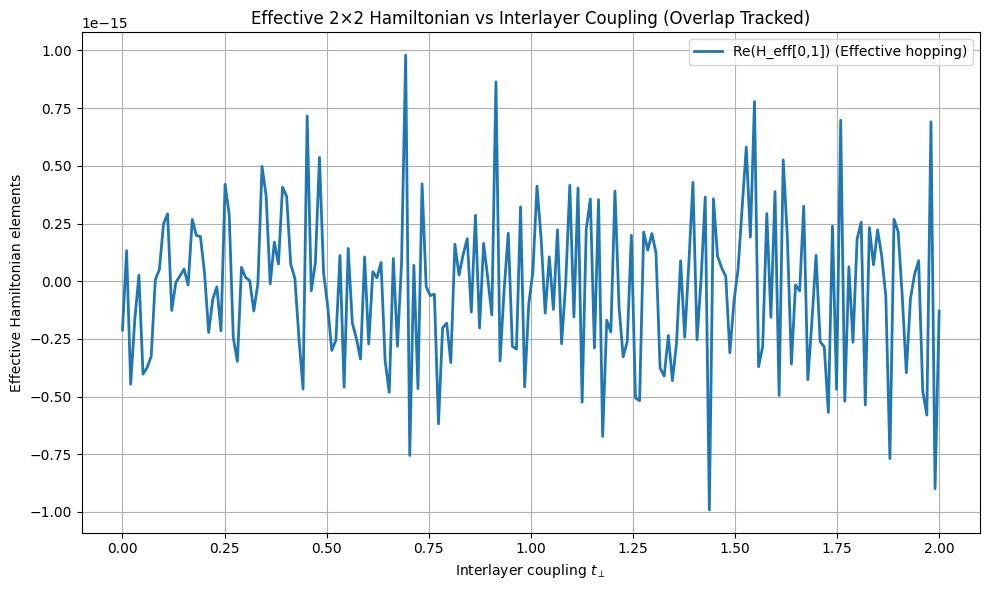

In [14]:
import numpy as np
import matplotlib.pyplot as plt
# Parameters
t = 1.0                               # intra-chain hopping
t_perp_vals = np.linspace(0.0, 2.0, 200)  # interlayer couplings to scan
# Arrays to store effective Hamiltonian elements
onsite_1, onsite_2 = [], []
t_eff_real, t_eff_imag = [], []
# Step 1: Build H_full at reference t_perp = 0 and get two reference eigenstates
t_perp_ref = 0.1
def build_H_full(t_perp):
    H_chain = -t * np.array([
        [0, 1, 0, 0],
        [1, 0, 1, 0],
        [0, 1, 0, 1],
        [0, 0, 1, 0]
    ])
    I4 = np.eye(4)
    H_full = np.block([
        [H_chain, t_perp * I4],
        [t_perp * I4, H_chain]
    ])
    return H_full
# Get reference eigenstates
H_ref = build_H_full(t_perp_ref)
eigvals_ref, eigvecs_ref = np.linalg.eigh(H_ref)
ref_idx = np.argsort(np.abs(eigvals_ref))[:2]
ref_states = eigvecs_ref[:, ref_idx]  # shape: (8, 2)
# Step 2: Loop over t_perp values
for t_perp in t_perp_vals:
    H = build_H_full(t_perp)
    eigvals, eigvecs = np.linalg.eigh(H)

    # Compute overlaps between current eigenstates and reference ones
    overlaps = np.abs(ref_states.T.conj() @ eigvecs)**2  # shape: (2, 8)
    overlap_scores = overlaps.sum(axis=0)  # total overlap for each state

    best_match_idx = np.argsort(overlap_scores)[-2:]  # indices of most similar states
    new_basis = eigvecs[:, best_match_idx]  # (8, 2)

    # Ensure orthonormality
    Q, _ = np.linalg.qr(new_basis)

    # Project full H to effective 2x2 Hamiltonian
    P = Q.T.conj()
    H_eff = P @ H @ P.T.conj()
    H_eff = np.real_if_close(H_eff)

    # Store matrix elements
    onsite_1.append(H_eff[0, 0])
    onsite_2.append(H_eff[1, 1])
    t_eff_real.append(np.real(H_eff[0, 1]))
    t_eff_imag.append(np.imag(H_eff[0, 1]))
# Step 3: Plot results
plt.figure(figsize=(10, 6))
#plt.plot(t_perp_vals, onsite_1, label='H_eff[0,0] (Onsite 1)', linestyle='--')
#plt.plot(t_perp_vals, onsite_2, label='H_eff[1,1] (Onsite 2)', linestyle='--')
plt.plot(t_perp_vals, t_eff_real, label='Re(H_eff[0,1]) (Effective hopping)', linewidth=2)
#plt.plot(t_perp_vals, t_eff_imag, label='Im(H_eff[0,1]) (should ≈ 0)', linestyle=':')
plt.xlabel('Interlayer coupling $t_\\perp$')
plt.ylabel('Effective Hamiltonian elements')
plt.title('Effective 2×2 Hamiltonian vs Interlayer Coupling (Overlap Tracked)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

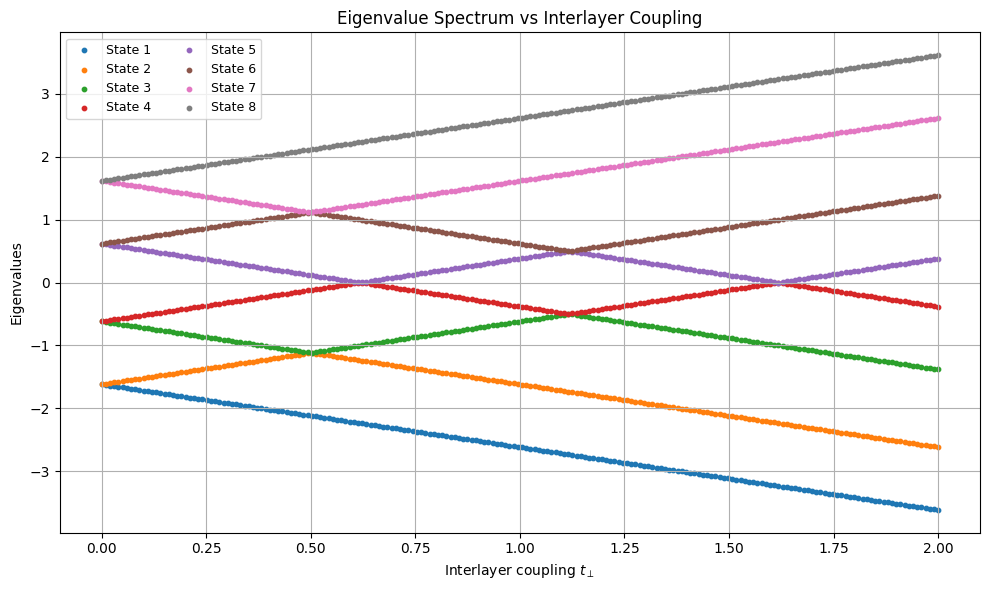

In [15]:
import numpy as np
import matplotlib.pyplot as plt
# Parameters
t = 1.0
t_perp_vals = np.linspace(0, 2, 200)

# To store all eigenvalues at each t_perp
eigval_list = []

# Hamiltonian builder
def build_H_full(t_perp):
    H_chain = -t * np.array([
        [0, 1, 0, 0],
        [1, 0, 1, 0],
        [0, 1, 0, 1],
        [0, 0, 1, 0]
    ])
    I4 = np.eye(4)
    H_full = np.block([
        [H_chain, t_perp * I4],
        [t_perp * I4, H_chain]
    ])
    return H_full

# Compute and collect eigenvalues
for t_perp in t_perp_vals:
    H = build_H_full(t_perp)
    eigvals = np.linalg.eigvalsh(H)  # returns sorted eigenvalues
    eigval_list.append(eigvals)

eigval_array = np.array(eigval_list)  # shape (len(t_perp_vals), 8)

# Plot: each eigenvalue as a separate scatter series
plt.figure(figsize=(10, 6))
for i in range(8):
    plt.scatter(t_perp_vals, eigval_array[:, i], s=10, label=f'State {i+1}')

plt.xlabel('Interlayer coupling $t_\\perp$')
plt.ylabel('Eigenvalues')
plt.title('Eigenvalue Spectrum vs Interlayer Coupling')
plt.grid(True)
plt.legend(ncol=2, fontsize=9)
plt.tight_layout()
plt.show()

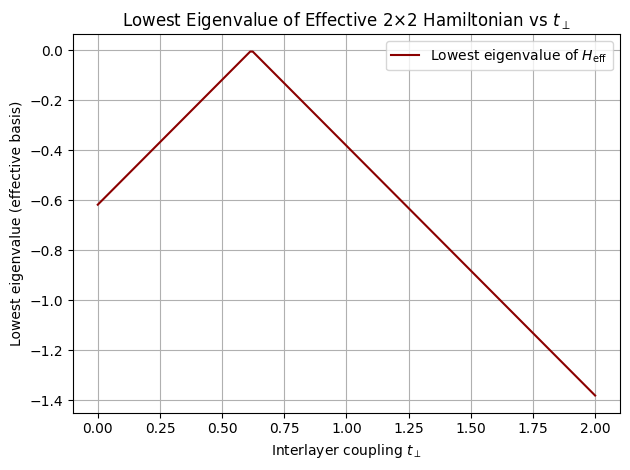

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
t = 1.0
t_perp_vals = np.linspace(0, 2, 200)
lowest_eig_eff = []

# Function to build the 8x8 full Hamiltonian
def build_H_full(t_perp):
    H_chain = -t * np.array([
        [0, 1, 0, 0],
        [1, 0, 1, 0],
        [0, 1, 0, 1],
        [0, 0, 1, 0]
    ])
    I4 = np.eye(4)
    H_full = np.block([
        [H_chain, t_perp * I4],
        [t_perp * I4, H_chain]
    ])
    return H_full

# Step 1: Choose reference t_perp and reference states
t_perp_ref = 0.1
H_ref = build_H_full(t_perp_ref)
eigvals_ref, eigvecs_ref = np.linalg.eigh(H_ref)
ref_idx = np.argsort(np.abs(eigvals_ref))[:2]
ref_states = eigvecs_ref[:, ref_idx]  # shape: (8, 2)

# Step 2: Loop over t_perp values and project
for t_perp in t_perp_vals:
    H = build_H_full(t_perp)
    eigvals, eigvecs = np.linalg.eigh(H)

    # Compute overlaps with reference states
    overlaps = np.abs(ref_states.T.conj() @ eigvecs)**2  # shape: (2, 8)
    total_overlap = overlaps.sum(axis=0)  # shape: (8,)
    best_match_idx = np.argsort(total_overlap)[-2:]
    new_basis = eigvecs[:, best_match_idx]

    # Orthonormalize basis
    Q, _ = np.linalg.qr(new_basis)

    # Project full Hamiltonian to 2x2 subspace
    P = Q.T.conj()
    H_eff = P @ H @ P.T.conj()
    H_eff = np.real_if_close(H_eff)

    # Diagonalize effective Hamiltonian and get lowest eigenvalue
    eigvals_eff = np.linalg.eigvalsh(H_eff)
    lowest_eig_eff.append(np.min(eigvals_eff))

# Step 3: Plot
plt.plot(t_perp_vals, lowest_eig_eff, label='Lowest eigenvalue of $H_{\\mathrm{eff}}$', color='darkred')
plt.xlabel('Interlayer coupling $t_\\perp$')
plt.ylabel('Lowest eigenvalue (effective basis)')
plt.title('Lowest Eigenvalue of Effective 2×2 Hamiltonian vs $t_\\perp$')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

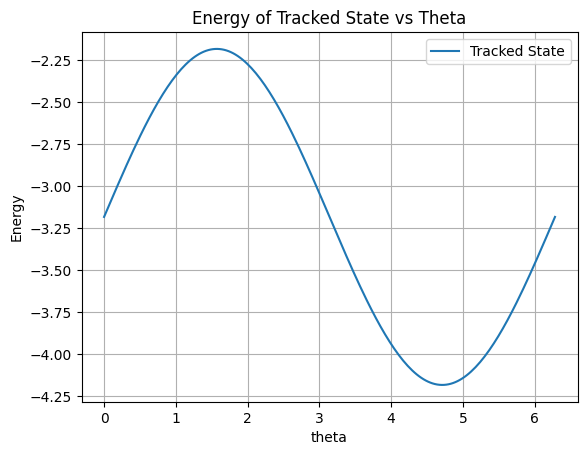

In [17]:
import numpy as np
import matplotlib.pyplot as plt
N = 10
theta_vals = np.linspace(0, 2*np.pi, 200)
def H(theta):
    np.random.seed(0)
    base = np.random.randn(N, N)
    sym = (base + base.T) / 2
    return sym + np.sin(theta) * np.eye(N)
# Store energies and state tracking
energies = []
prev_eigvecs = None
tracked_indices = []
for idx, theta in enumerate(theta_vals):
    H_theta = H(theta)
    eigvals, eigvecs = np.linalg.eigh(H_theta)  # eigenvectors: columns of eigvecs
    if idx == 0:
        # At first step, initialize by picking the ground state
        tracked_indices.append(0)
        energies.append([eigvals[0]])
        prev_eigvecs = eigvecs
    else:
        # Track the previous eigenvector
        prev_state = prev_eigvecs[:, tracked_indices[-1]]
        # Compute overlaps with all new eigenvectors
        overlaps = [np.abs(np.dot(prev_state.conj(), eigvecs[:, i])) for i in range(N)]
        new_index = np.argmax(overlaps)  # most similar eigenvector
        tracked_indices.append(new_index)
        energies.append([eigvals[new_index]])
        prev_eigvecs = eigvecs
energies = np.array(energies).flatten()
# Plot tracked ground state energy
plt.plot(theta_vals, energies, label='Tracked State')
plt.xlabel('theta')
plt.ylabel('Energy')
plt.title('Energy of Tracked State vs Theta')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eigh, norm

# Set random seed for reproducibility
np.random.seed(42)

# Define dimension and parameter range
n = 8
theta_vals = np.linspace(0, np.pi, 100)

# Generate a Hermitian matrix A and a perturbation B
A = np.random.randn(n, n) + 1j * np.random.randn(n, n)
A = (A + A.conj().T) / 2  # Make A Hermitian

B = np.random.randn(n, n) + 1j * np.random.randn(n, n)
B = (B + B.conj().T) / 2  # Make B Hermitian

# Define H(θ) = A + sin(θ) * B
def H(theta):
    return A + np.sin(theta) * B

# Track eigenvectors and eigenvalues
eigvals = []
tracked_state_exact = []
tracked_state_overlap = []

# Initial diagonalization
H0 = H(theta_vals[0])
vals0, vecs0 = eigh(H0)

# Pick an eigenvector to track (e.g., the ground state at theta=0)
j0 = 0
tracked_vec = vecs0[:, j0]
tracked_state_exact.append(tracked_vec)
tracked_state_overlap.append(tracked_vec)
eigvals.append(vals0[j0])

# Loop over thetas and track the eigenstate
prev_vec = tracked_vec
for theta in theta_vals[1:]:
    Ht = H(theta)
    vals, vecs = eigh(Ht)

    # Exact tracking: get all eigvals and eigvecs for plotting
    O = np.abs(vecs.conj().T @ prev_vec)
    j = np.argmax(O)
    matched_vec = vecs[:, j]

    eigvals.append(vals[j])
    tracked_state_overlap.append(matched_vec)
    tracked_state_exact.append(vecs[:, j0])  # Just for reference

    prev_vec = matched_vec

# Compute fidelity between tracked and true state at each step
fidelities = [np.abs(np.vdot(tracked_state_exact[i], tracked_state_overlap[i])) for i in range(len(theta_vals))]

theta_vals = np.array(theta_vals)
eigvals = np.array(eigvals)
fidelities = np.array(fidelities)

theta_vals, eigvals, fidelities[:5]  # show sample fidelity values



(array([0.        , 0.03173326, 0.06346652, 0.09519978, 0.12693304,
        0.1586663 , 0.19039955, 0.22213281, 0.25386607, 0.28559933,
        0.31733259, 0.34906585, 0.38079911, 0.41253237, 0.44426563,
        0.47599889, 0.50773215, 0.53946541, 0.57119866, 0.60293192,
        0.63466518, 0.66639844, 0.6981317 , 0.72986496, 0.76159822,
        0.79333148, 0.82506474, 0.856798  , 0.88853126, 0.92026451,
        0.95199777, 0.98373103, 1.01546429, 1.04719755, 1.07893081,
        1.11066407, 1.14239733, 1.17413059, 1.20586385, 1.23759711,
        1.26933037, 1.30106362, 1.33279688, 1.36453014, 1.3962634 ,
        1.42799666, 1.45972992, 1.49146318, 1.52319644, 1.5549297 ,
        1.58666296, 1.61839622, 1.65012947, 1.68186273, 1.71359599,
        1.74532925, 1.77706251, 1.80879577, 1.84052903, 1.87226229,
        1.90399555, 1.93572881, 1.96746207, 1.99919533, 2.03092858,
        2.06266184, 2.0943951 , 2.12612836, 2.15786162, 2.18959488,
        2.22132814, 2.2530614 , 2.28479466, 2.31

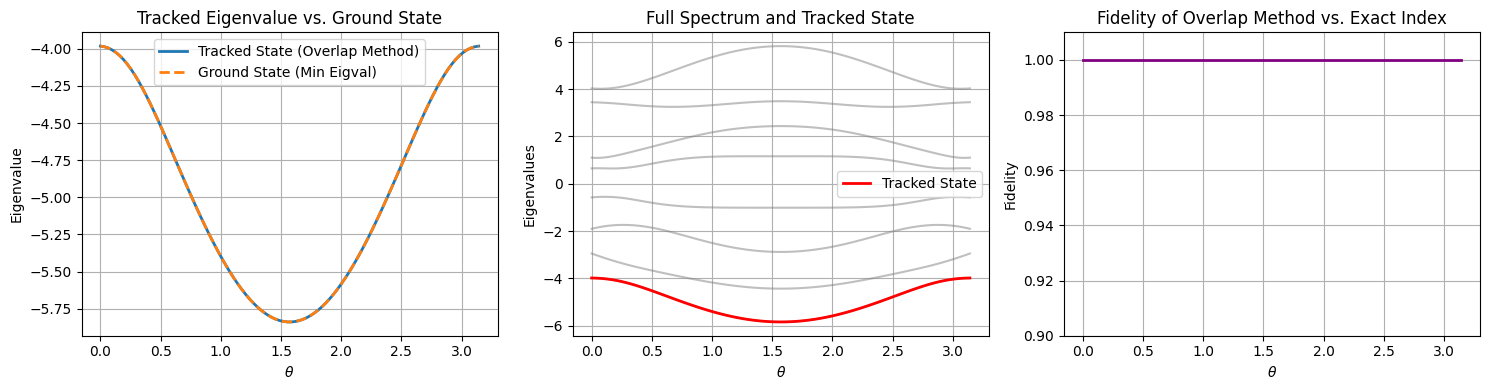

In [20]:
# Compute full spectrum at each theta for comparison
full_spectrum = []
lowest_eigval = []

for theta in theta_vals:
    vals, _ = eigh(H(theta))
    full_spectrum.append(vals)
    lowest_eigval.append(vals[0])  # Always the ground state

full_spectrum = np.array(full_spectrum)
lowest_eigval = np.array(lowest_eigval)

# Plot tracked eigenvalue vs theta and compare to ground state
plt.figure(figsize=(15, 4))

# --- Plot 1: Tracked eigenvalue vs theta ---
plt.subplot(1, 3, 1)
plt.plot(theta_vals, eigvals, label='Tracked State (Overlap Method)', linewidth=2)
plt.plot(theta_vals, lowest_eigval, '--', label='Ground State (Min Eigval)', linewidth=2)
plt.xlabel(r'$\theta$')
plt.ylabel('Eigenvalue')
plt.title('Tracked Eigenvalue vs. Ground State')
plt.legend()
plt.grid(True)

# --- Plot 2: Full Spectrum vs theta ---
plt.subplot(1, 3, 2)
for i in range(n):
    plt.plot(theta_vals, full_spectrum[:, i], 'gray', alpha=0.5)
plt.plot(theta_vals, eigvals, 'r', label='Tracked State', linewidth=2)
plt.xlabel(r'$\theta$')
plt.ylabel('Eigenvalues')
plt.title('Full Spectrum and Tracked State')
plt.grid(True)
plt.legend()

# --- Plot 3: Fidelity vs theta ---
fidelities = [np.abs(np.vdot(tracked_state_exact[i], tracked_state_overlap[i])) for i in range(len(theta_vals))]

plt.subplot(1, 3, 3)
plt.plot(theta_vals, fidelities, 'purple', linewidth=2)
plt.xlabel(r'$\theta$')
plt.ylabel('Fidelity')
plt.ylim(0.9, 1.01)
plt.title('Fidelity of Overlap Method vs. Exact Index')
plt.grid(True)

plt.tight_layout()
plt.show()


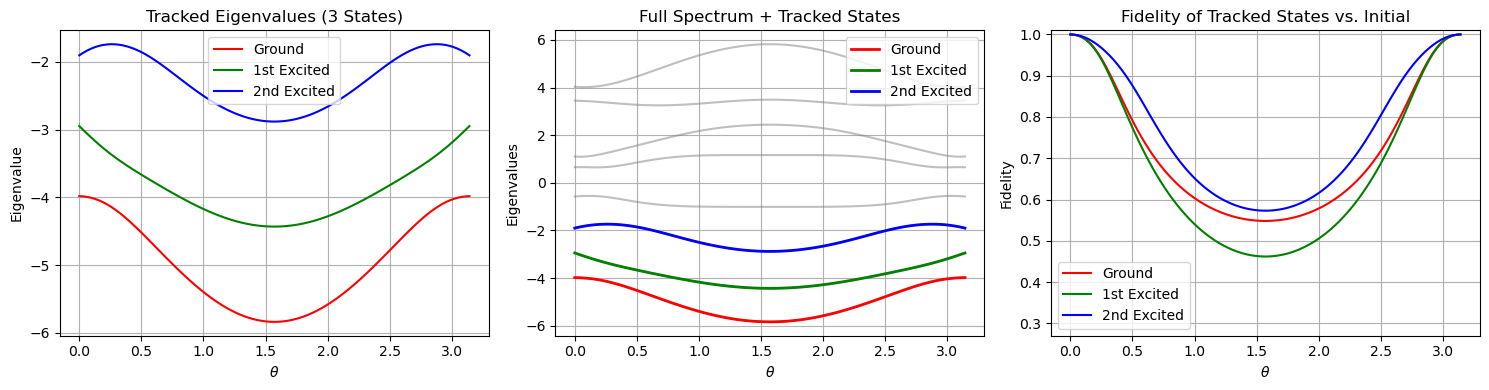

In [18]:
# Track 3 eigenstates: indices 0 (ground), 1 (1st excited), 2 (2nd excited) at theta = 0

# Diagonalize at theta = 0
evals0, evecs0 = eigh(H(0))
initial_indices = [0, 1, 2]  # indices of the 3 lowest eigenstates
tracked_vectors = [evecs0[:, i] for i in initial_indices]
tracked_eigvals = [[] for _ in initial_indices]
tracked_fidelities = [[] for _ in initial_indices]
stored_vectors = [[] for _ in initial_indices]

# Step through theta values
for theta in theta_vals:
    evals, evecs = eigh(H(theta))
    used_indices = set()
    next_vectors = [None] * len(initial_indices)
    
    # Build overlap matrix
    overlaps = np.abs(np.array([
        [np.vdot(prev_v, evecs[:, j]) for j in range(n)]
        for prev_v in tracked_vectors
    ]))
    
    # Greedy assignment: highest unmatched overlaps
    for i in range(len(initial_indices)):
        # mask used indices to avoid duplicate matches
        overlaps[i, list(used_indices)] = -1
        j = np.argmax(overlaps[i])
        used_indices.add(j)
        next_vectors[i] = evecs[:, j]
        tracked_eigvals[i].append(evals[j])
        tracked_fidelities[i].append(np.abs(np.vdot(evecs0[:, initial_indices[i]], evecs[:, j])))
        stored_vectors[i].append(evecs[:, j])
    
    tracked_vectors = next_vectors  # update for next step

# Convert to numpy arrays
tracked_eigvals = [np.array(vals) for vals in tracked_eigvals]
tracked_fidelities = [np.array(fids) for fids in tracked_fidelities]

# Plotting
plt.figure(figsize=(15, 4))

# --- Plot 1: Tracked eigenvalues ---
plt.subplot(1, 3, 1)
colors = ['red', 'green', 'blue']
labels = ['Ground', '1st Excited', '2nd Excited']
for i in range(3):
    plt.plot(theta_vals, tracked_eigvals[i], label=labels[i], color=colors[i])
plt.xlabel(r'$\theta$')
plt.ylabel('Eigenvalue')
plt.title('Tracked Eigenvalues (3 States)')
plt.grid(True)
plt.legend()

# --- Plot 2: Full Spectrum with Tracked States ---
plt.subplot(1, 3, 2)
for i in range(n):
    plt.plot(theta_vals, full_spectrum[:, i], 'gray', alpha=0.5)
for i in range(3):
    plt.plot(theta_vals, tracked_eigvals[i], label=labels[i], color=colors[i], linewidth=2)
plt.xlabel(r'$\theta$')
plt.ylabel('Eigenvalues')
plt.title('Full Spectrum + Tracked States')
plt.grid(True)
plt.legend()

# --- Plot 3: Fidelities ---
plt.subplot(1, 3, 3)
for i in range(3):
    plt.plot(theta_vals, tracked_fidelities[i], label=labels[i], color=colors[i])
plt.xlabel(r'$\theta$')
plt.ylabel('Fidelity')
plt.ylim(0.27, 1.01)
plt.title('Fidelity of Tracked States vs. Initial')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


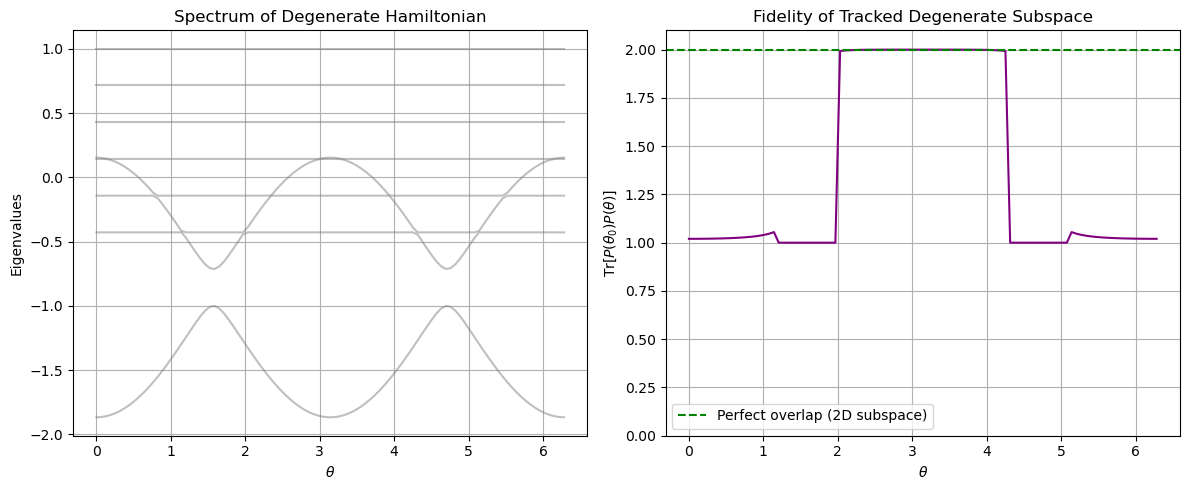

In [19]:
# Define a Hamiltonian that has a controllable degeneracy
def H_deg(theta):
    """Hamiltonian with degeneracy at theta = pi"""
    # Fixed part (Hermitian)
    A = np.diag(np.linspace(-1, 1, n))  # diagonal with increasing values
    B = np.zeros((n, n))
    B[0, 1] = B[1, 0] = 1  # only couple state 0 and 1
    
    # At theta = 0, mostly A; at theta = pi, degeneracy is introduced
    return A + np.cos(theta) * B

# Choose a range of theta around the degeneracy
theta_vals_deg = np.linspace(0, 2 * np.pi, 100)
degeneracy_index = [0, 1]  # We'll track the degenerate subspace spanned by state 0 and 1 at theta = pi

# Get eigenvectors at theta = pi (degeneracy point)
theta0 = np.pi
evals0, evecs0 = eigh(H_deg(theta0))
deg_subspace = evecs0[:, degeneracy_index]  # shape (n, 2)
P0 = deg_subspace @ deg_subspace.conj().T  # projector onto the degenerate subspace

# Track subspace overlap fidelity
subspace_fidelity = []

for theta in theta_vals_deg:
    evals, evecs = eigh(H_deg(theta))
    current_subspace = evecs[:, degeneracy_index]
    P_theta = current_subspace @ current_subspace.conj().T
    fidelity = np.trace(P0 @ P_theta).real  # should be in [0, 2] for 2D subspace
    subspace_fidelity.append(fidelity)

# Plot the spectrum and subspace fidelity
plt.figure(figsize=(12, 5))

# Spectrum
plt.subplot(1, 2, 1)
spectrum = np.array([eigh(H_deg(theta))[0] for theta in theta_vals_deg])
for i in range(n):
    plt.plot(theta_vals_deg, spectrum[:, i], color='gray', alpha=0.5)
plt.title("Spectrum of Degenerate Hamiltonian")
plt.xlabel(r'$\theta$')
plt.ylabel('Eigenvalues')
plt.grid(True)
# Fidelity
plt.subplot(1, 2, 2)
plt.plot(theta_vals_deg, subspace_fidelity, color='purple')
plt.axhline(2, color='green', linestyle='--', label='Perfect overlap (2D subspace)')
plt.title("Fidelity of Tracked Degenerate Subspace")
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\mathrm{Tr}[P(\theta_0) P(\theta)]$')
plt.ylim(0, 2.1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

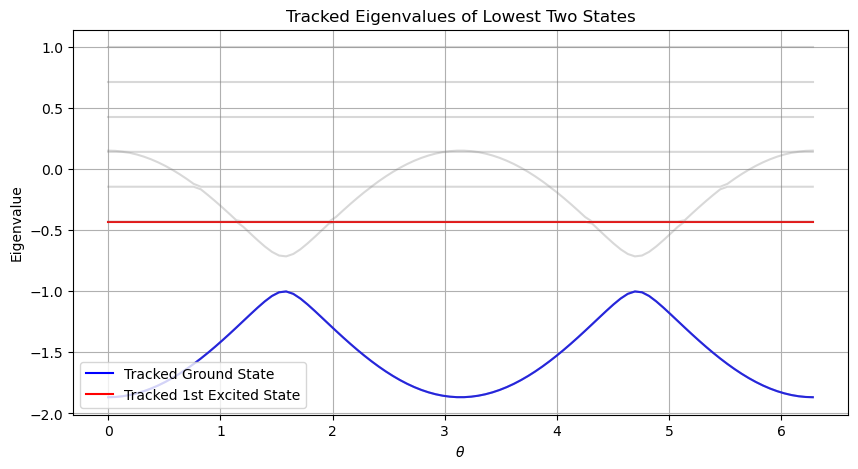

In [20]:
# We will track the indices of the lowest two eigenstates using vector overlap
# Start from theta = 0
theta_start = 0
evals_start, evecs_start = eigh(H_deg(theta_start))
v0_track = [evecs_start[:, 0]]  # ground state
v1_track = [evecs_start[:, 1]]  # 1st excited

tracked_evals_v0 = [evals_start[0]]
tracked_evals_v1 = [evals_start[1]]

v0_prev = evecs_start[:, 0]
v1_prev = evecs_start[:, 1]

for i, theta in enumerate(theta_vals_deg[1:], start=1):
    evals, evecs = eigh(H_deg(theta))

    # Find best overlap for v0_prev
    overlaps0 = [np.abs(np.vdot(v0_prev, evecs[:, j])) for j in range(n)]
    idx0 = np.argmax(overlaps0)
    v0_now = evecs[:, idx0]
    tracked_evals_v0.append(evals[idx0])
    v0_track.append(v0_now)

    # Remove idx0 to avoid duplicate assignment
    mask = np.ones(n, dtype=bool)
    mask[idx0] = False

    # Find best overlap for v1_prev among remaining states
    overlaps1 = [np.abs(np.vdot(v1_prev, evecs[:, j])) if mask[j] else -1 for j in range(n)]
    idx1 = np.argmax(overlaps1)
    v1_now = evecs[:, idx1]
    tracked_evals_v1.append(evals[idx1])
    v1_track.append(v1_now)

    # Update for next iteration
    v0_prev = v0_now
    v1_prev = v1_now

# Plot tracked eigenvalues of the two states
plt.figure(figsize=(10, 5))
plt.plot(theta_vals_deg, tracked_evals_v0, label="Tracked Ground State", color='blue')
plt.plot(theta_vals_deg, tracked_evals_v1, label="Tracked 1st Excited State", color='red')

# Also plot the full spectrum for context
spectrum = np.array([eigh(H_deg(theta))[0] for theta in theta_vals_deg])
for i in range(n):
    plt.plot(theta_vals_deg, spectrum[:, i], color='gray', alpha=0.3)

plt.title("Tracked Eigenvalues of Lowest Two States")
plt.xlabel(r'$\theta$')
plt.ylabel('Eigenvalue')
plt.legend()
plt.grid(True)
plt.show()


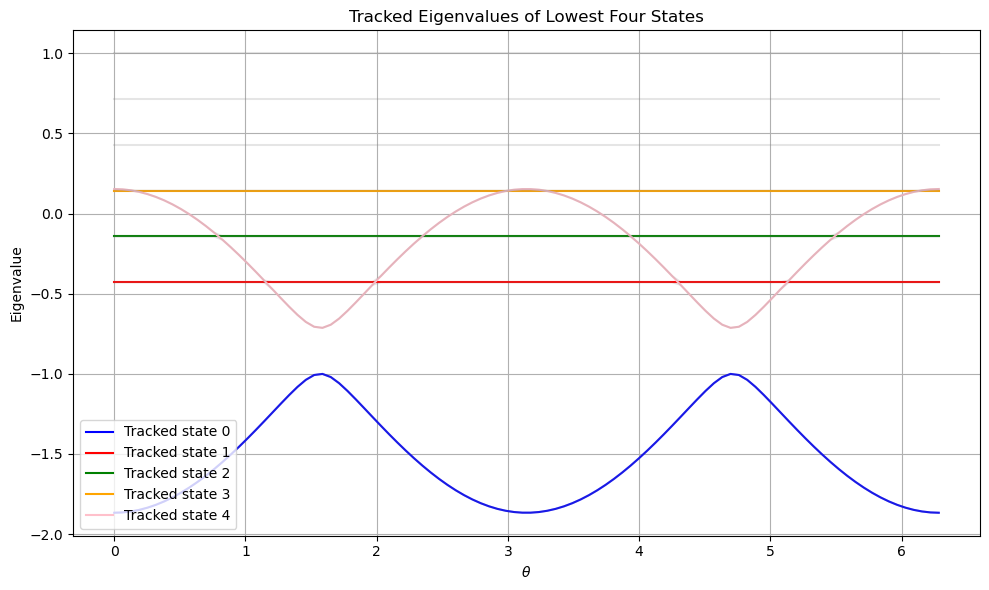

In [23]:
# Number of states to track
num_track = 5

# Start at theta = 0
evals_start, evecs_start = eigh(H_deg(theta_vals_deg[0]))
tracked_vecs = [evecs_start[:, i] for i in range(num_track)]
tracked_evals = [[] for _ in range(num_track)]

# Store initial eigenvalues
for i in range(num_track):
    tracked_evals[i].append(evals_start[i])

# Track over theta
prev_vecs = tracked_vecs.copy()

for theta in theta_vals_deg[1:]:
    evals, evecs = eigh(H_deg(theta))
    assigned = np.zeros(n, dtype=bool)
    new_vecs = []

    for i in range(num_track):
        overlaps = np.array([np.abs(np.vdot(prev_vecs[i], evecs[:, j])) if not assigned[j] else -1 for j in range(n)])
        idx = np.argmax(overlaps)
        assigned[idx] = True
        new_vecs.append(evecs[:, idx])
        tracked_evals[i].append(evals[idx])

    prev_vecs = new_vecs

# Plot tracked eigenvalues of the 4 states
plt.figure(figsize=(10, 6))

colors = ['blue', 'red', 'green', 'orange', 'pink']
labels = [f"Tracked state {i}" for i in range(num_track)]

for i in range(num_track):
    plt.plot(theta_vals_deg, tracked_evals[i], label=labels[i], color=colors[i])

# Also plot the full spectrum for context
spectrum = np.array([eigh(H_deg(theta))[0] for theta in theta_vals_deg])
for i in range(n):
    plt.plot(theta_vals_deg, spectrum[:, i], color='gray', alpha=0.2)

plt.title("Tracked Eigenvalues of Lowest Four States")
plt.xlabel(r'$\theta$')
plt.ylabel('Eigenvalue')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
